In [1]:
'''Additive Models in Python
This notebook walks through the process of creating additive models for time-series data in Python. In particular, we use the Facebook Prophet package and financial data from quandl. '''

'Additive Models in Python\nThis notebook walks through the process of creating additive models for time-series data in Python. In particular, we use the Facebook Prophet package and financial data from quandl. '

In [2]:
# quandly for financial data
import quandl
# pandas for data manipulation
import pandas as pd

In [3]:
# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [4]:
# Retrieve TSLA data from Quandl
quandl.ApiConfig.api_key = 'rFsSehe51RLzREtYhLfo'

tesla = quandl.get('WIKI/TSLA')
print(tesla.head(5))

# Retrieve the GM data from Quandl
gm = quandl.get('WIKI/GM')
gm.head(5)

             Open     High    Low  Close      Volume  Ex-Dividend  \
Date                                                                
2010-06-29  19.00  25.0000  17.54  23.89  18766300.0          0.0   
2010-06-30  25.79  30.4192  23.30  23.83  17187100.0          0.0   
2010-07-01  25.00  25.9200  20.27  21.96   8218800.0          0.0   
2010-07-02  23.00  23.1000  18.71  19.20   5139800.0          0.0   
2010-07-06  20.00  20.0000  15.83  16.11   6866900.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2010-06-29          1.0      19.00    25.0000     17.54       23.89   
2010-06-30          1.0      25.79    30.4192     23.30       23.83   
2010-07-01          1.0      25.00    25.9200     20.27       21.96   
2010-07-02          1.0      23.00    23.1000     18.71       19.20   
2010-07-06          1.0      20.00    20.0000     15.83       16.11   

            Adj. V

Open   High    Low  Close       Volume  Ex-Dividend  Split Ratio  \
Date                                                                            
2010-11-18  35.00  35.99  33.89  34.19  457044300.0          0.0          1.0   
2010-11-19  34.15  34.50  33.11  34.26  107842000.0          0.0          1.0   
2010-11-22  34.20  34.48  33.81  34.08   36650600.0          0.0          1.0   
2010-11-23  33.95  33.99  33.19  33.25   31170200.0          0.0          1.0   
2010-11-24  33.73  33.80  33.22  33.48   26138000.0          0.0          1.0   

            Adj. Open  Adj. High   Adj. Low  Adj. Close  Adj. Volume  
Date                                                                  
2010-11-18  29.988317  30.836558  29.037259   29.294302  457044300.0  
2010-11-19  29.260029  29.559912  28.368948   29.354278  107842000.0  
2010-11-22  29.302870  29.542776  28.968714   29.200053   36650600.0  
2010-11-23  29.088668  29.122940  28.437493   28.488901   31170200.0  
2010-11-24  28.900170  28.960146  28.463197   28.685967   26138000.0

In [5]:
print(gm.index)

DatetimeIndex(['2010-11-18', '2010-11-19', '2010-11-22', '2010-11-23',
               '2010-11-24', '2010-11-26', '2010-11-29', '2010-11-30',
               '2010-12-01', '2010-12-02',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=1849, freq=None)


C:\Users\sanka\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


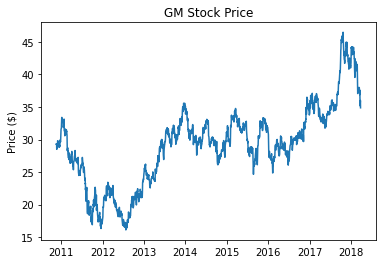

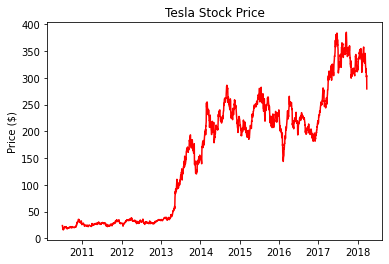

In [6]:
# The adjusted close accounts for stock splits, so that is what we should graph
plt.plot(gm.index, gm['Adj. Close'])
plt.title('GM Stock Price')
plt.ylabel('Price ($)');
plt.show()

plt.plot(tesla.index, tesla['Adj. Close'], 'r')
plt.title('Tesla Stock Price')
plt.ylabel('Price ($)');
plt.show();

In [7]:
'''In order to compare the companies, we need to compute their market capitalization. Quandl does not provide this data, but we can figure out the market cap ourselves by multiplying the average number of shares outstanding in each year times the share price.'''

# Yearly average number of shares outstanding for Tesla and GM
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 
                2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}

gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 
                2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010: 1.50e9}

In [8]:
print(tesla.index.year)

Int64Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='Date', length=1949)


In [9]:
# Create a year column
tesla['Year'] = tesla.index.year

# Take Dates from index and move to Date column 
tesla.reset_index(level=0, inplace = True)
tesla['cap'] = 0
# print(tesla.cap)
# Calculate market cap for all years
for i, year in enumerate(tesla['Year']):
    # Retrieve the shares for the year
    shares = tesla_shares.get(year)
#     print(shares)
    # Update the cap column to shares times the price
    tesla.loc[i, 'cap'] = shares * tesla.loc[i, 'Adj. Close']

In [10]:
# print(shares)

In [11]:
gm['Year'] = gm.index.year

# Take Dates from index and move to Date column 
gm.reset_index(level=0, inplace = True)
gm['cap'] = 0

# Calculate market cap for all years
for i, year in enumerate(gm['Year']):
    # Retrieve the shares for the year
    shares = gm_shares.get(year)
    
    # Update the cap column to shares times the price
    gm.loc[i, 'cap'] = shares * gm.loc[i, 'Adj. Close']

In [12]:
# Merge the two datasets and rename the columns
cars = gm.merge(tesla, how='inner', on='Date')
print(cars)
cars.rename(columns={'cap_x': 'gm_cap', 'cap_y': 'tesla_cap'}, inplace=True)
print(cars)

           Date  Open_x   High_x    Low_x  Close_x     Volume_x  \
0    2010-11-18   35.00  35.9900  33.8900    34.19  457044300.0   
1    2010-11-19   34.15  34.5000  33.1100    34.26  107842000.0   
2    2010-11-22   34.20  34.4800  33.8100    34.08   36650600.0   
3    2010-11-23   33.95  33.9900  33.1900    33.25   31170200.0   
4    2010-11-24   33.73  33.8000  33.2200    33.48   26138000.0   
5    2010-11-26   33.41  33.8100  33.2100    33.80   12301200.0   
6    2010-11-29   33.80  33.8100  33.0700    33.80   27776900.0   
7    2010-11-30   33.53  34.2500  33.3600    34.20   57476900.0   
8    2010-12-01   34.65  34.9500  34.4200    34.78   34633200.0   
9    2010-12-02   34.92  34.9800  34.5100    34.68   23196100.0   
10   2010-12-03   34.55  34.6000  33.9700    34.55   19395200.0   
11   2010-12-06   34.48  34.7800  34.4100    34.48   11676500.0   
12   2010-12-07   34.75  34.8900  34.4600    34.68   20823000.0   
13   2010-12-08   34.61  34.7300  34.3300    34.45   12603900.

In [13]:
# Select only the relevant columns
cars = cars.loc[:, ['Date', 'gm_cap', 'tesla_cap']]

# Divide to get market cap in billions of dollars
cars['gm_cap'] = cars['gm_cap'] / 1e9
cars['tesla_cap'] = cars['tesla_cap'] / 1e9

cars.head()

Date     gm_cap  tesla_cap
0 2010-11-18  43.941453    1.52439
1 2010-11-19  44.031417    1.58049
2 2010-11-22  43.800079    1.70340
3 2010-11-23  42.733352    1.76307
4 2010-11-24  43.028951    1.80897

'Tesla briefly surpassed GM in market cap in 2017. When did this occur?'

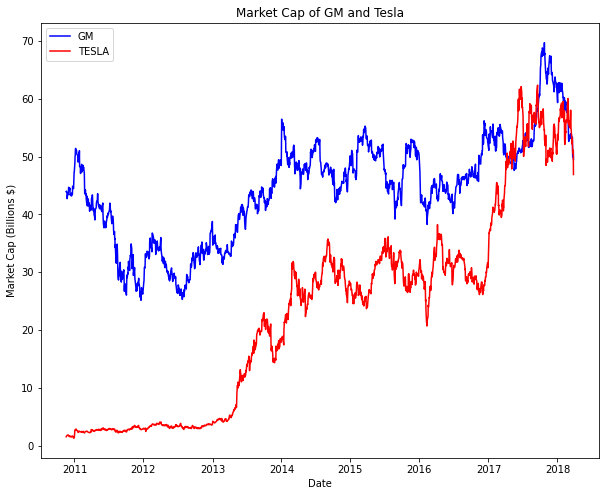

In [14]:
plt.figure(figsize=(10, 8))
plt.plot(cars['Date'], cars['gm_cap'], 'b-', label = 'GM')
plt.plot(cars['Date'], cars['tesla_cap'], 'r-', label = 'TESLA')
plt.xlabel('Date'); 
plt.ylabel('Market Cap (Billions $)'); 
plt.title('Market Cap of GM and Tesla')
plt.legend();

'''Tesla briefly surpassed GM in market cap in 2017. When did this occur?'''

In [15]:
import numpy as np

# Find the first and last time Tesla was valued higher than GM
first_date = cars.loc[np.min(list(np.where(cars['tesla_cap'] > cars['gm_cap'])[0])), 'Date']
last_date = cars.loc[np.max(list(np.where(cars['tesla_cap'] > cars['gm_cap'])[0])), 'Date']

print("Tesla was valued higher than GM from {} to {}.".format(first_date.date(), last_date.date()))

'''During Q2 2017, Tesla sold 22026 cars while GM sold 725000. In Q3 2017, Tesla sold 26137 cars and GM sold 808000. In all of 2017, Tesla sold 103084 cars and GM sold 3002237. That means GM was valued less than Tesla in a year during which it sold 29 times more cars than Tesla! Interesting to say the least.'''

Tesla was valued higher than GM from 2017-04-10 to 2018-03-23.


'During Q2 2017, Tesla sold 22026 cars while GM sold 725000. In Q3 2017, Tesla sold 26137 cars and GM sold 808000. In all of 2017, Tesla sold 103084 cars and GM sold 3002237. That means GM was valued less than Tesla in a year during which it sold 29 times more cars than Tesla! Interesting to say the least.'

In [16]:
import fbprophet

# Prophet requires columns ds (Date) and y (value)
gm = gm.rename(columns={'Date': 'ds', 'cap': 'y'})
# Put market cap in billions
gm['y'] = gm['y'] / 1e9

# Make the prophet models and fit on the data
# changepoint_prior_scale can be changed to achieve a better fit
gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05)
gm_prophet.fit(gm)

# Repeat for the tesla data
tesla =tesla.rename(columns={'Date': 'ds', 'cap': 'y'})
tesla['y'] = tesla['y'] / 1e9
tesla_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05, n_changepoints=10)
tesla_prophet.fit(tesla);

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
# Make a future dataframe for 2 years
gm_forecast = gm_prophet.make_future_dataframe(periods=365 * 2, freq='D')
# Make predictions
gm_forecast = gm_prophet.predict(gm_forecast)

tesla_forecast = tesla_prophet.make_future_dataframe(periods=365*2, freq='D')
tesla_forecast = tesla_prophet.predict(tesla_forecast)

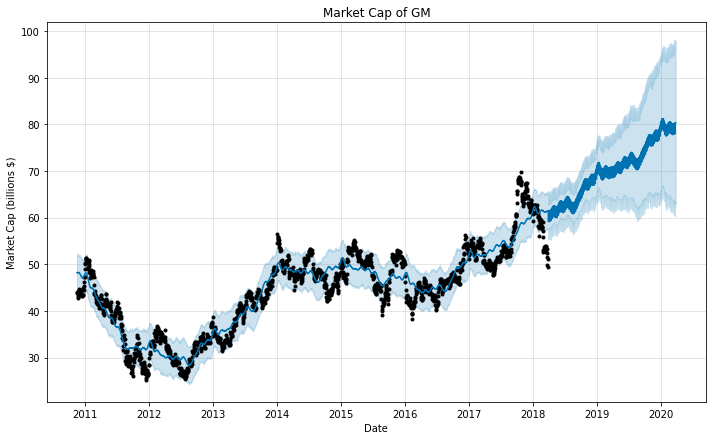

In [18]:
gm_prophet.plot(gm_forecast, xlabel = 'Date', ylabel = 'Market Cap (billions $)')
plt.title('Market Cap of GM');

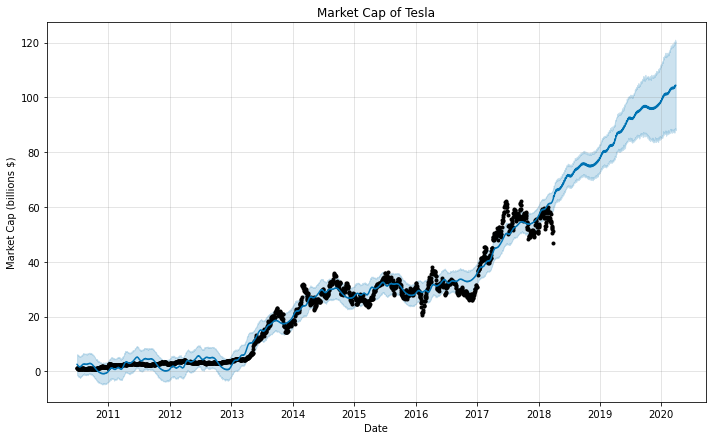

In [19]:
tesla_prophet.plot(tesla_forecast, xlabel = 'Date', ylabel = 'Market Cap (billions $)')
plt.title('Market Cap of Tesla');